In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Membaca dataset (pastikan Anda mengganti 'dataset.csv' dengan path dataset Anda)
data = pd.read_csv('heart.csv')

# Menampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
print(data.head())

# Memisahkan fitur (X) dan target (y)
X = data.drop('target', axis=1)  # Menghapus kolom target untuk fitur
y = data['target']  # Kolom target

# Membagi data menjadi 80% training dan 20% validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur (penting untuk algoritma berbasis gradien)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Melatih model pada data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data validasi
y_pred = model.predict(X_val)

# Evaluasi model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_val, y_pred))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1-Score: 0.99


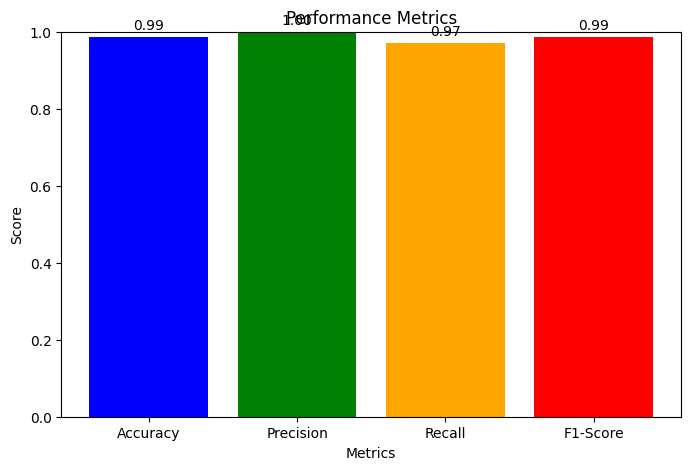

In [3]:
# Evaluasi model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Visualisasi metrik performa
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.show()

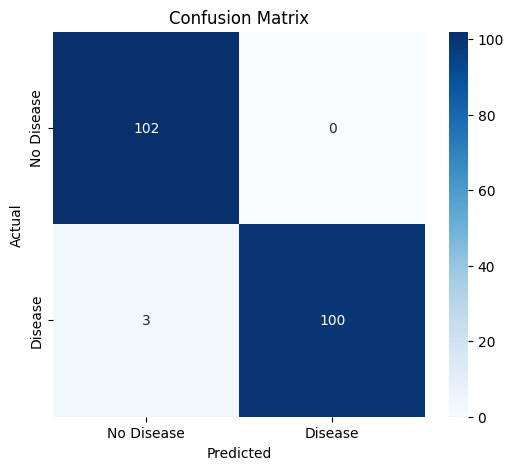

In [4]:
# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [5]:
import pickle

# Simpan model ke file 'model.pkl'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model telah disimpan ke 'model.pkl'")

Model telah disimpan ke 'model.pkl'


In [7]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [6]:
# Data tunggal yang Anda berikan
single_data = [[58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2]]

# Standarisasi data tunggal menggunakan scaler yang sudah dibuat
single_data_scaled = scaler.transform(single_data)

# Melakukan prediksi pada data tunggal
single_prediction = model.predict(single_data_scaled)
single_prediction_proba = model.predict_proba(single_data_scaled)

# Menampilkan hasil prediksi
print(f'Prediksi: {single_prediction[0]}')  # Hasil prediksi
print(f'Probabilitas kelas: {single_prediction_proba[0]}')  # Probabilitas untuk setiap kelas


Prediksi: 1
Probabilitas kelas: [0.01 0.99]


c:\Users\yudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
